<img src="https://www.iscte-iul.pt/assets/images/logo_iscte_detailed.svg" style="width: 450px;margin-top:30px;" align ="center">

<div style= "font-size: 40px;  margin-top:40px; font-weight:bold; font-family: 'Avenir Next LT Pro', sans-serif;"><center>Challenge 2 - Part 3: <strong>Transfer Learning</strong></center></div>
<div style= "font-size: 40px; font-weight:bold; font-family: 'Avenir Next LT Pro', sans-serif;"><center>for cats_and_dogs dataset using neural networks</center></div>

<div style= "font-size: 27px;font-weight:bold;line-height: 1.1; margin-top:40px; font-family: 'Avenir Next LT Pro', sans-serif;"><center>Aprendizagem Profunda para Visão por Computador 2024/2025</center></div> <br>

   <div style= "font-size: 20px;font-weight:bold; font-family: 'Avenir Next LT Pro', sans-serif;"><center> Grupo 7:</center></div>
   <div><center> Diogo Freitas | 104841 </center></div>
   <div><center> João Francisco Botas | 104782 </center></div>
   <div><center> Miguel Gonçalves | 105944 </center></div>
   <div><center> Ricardo Galvão | 105285 </center></div>

<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <style>
        body {
            font-family: Arial, sans-serif;
            background-color: #f4f4f4;
            color: #333;
            margin: 0;
            padding: 20px;
            line-height: 1.6;
        }
        ol {
            counter-reset: section;
            list-style: none;
            padding-left: 0;
        }
        /* First-level list */
        ol > li {
            counter-increment: section;
            margin-bottom: 10px;
            padding-left: 0;
        }
        ol > li::before {
            content: counters(section, ".") " ";
            font-weight: bold;
        }
        /* Second-level list */
        ol ol {
            counter-reset: subsection;
            padding-left: 20px;
            margin-top: 5px;
        }
        ol ol > li {
            counter-increment: subsection;
            margin-bottom: 5px;
            padding-left: 10px;
        }
        ol ol > li::before {
            content: counters(section, ".") "." counter(subsection) " ";
            font-weight: bold;
        }
        /* Third-level list */
        ol ol ol {
            counter-reset: subsubsection;
            padding-left: 40px;
            margin-top: 5px;
        }
        ol ol ol > li {
            counter-increment: subsubsection;
            margin-bottom: 5px;
            padding-left: 10px;
            font-size: 0.9em; /* Make font size smaller */
            font-weight: normal; /* Remove bold styling */
        }
        ol ol ol > li::before {
            content: counters(section, ".") "." counter(subsection) "." counter(subsubsection) " ";
            font-weight: bold;
        }
        a {
            text-decoration: none;
            color: #007BFF;
            font-weight: bold;
        }
        a:hover {
            color: #0056b3;
        }
        footer {
            margin-top: 50px;
        }
    </style>
</head>
<body>

<h2><b>Índice</b></h2>
<ol>
    <li><a href="#1">Objetivo desta parte</a></li>
    <li><a href="#2">Setup para desenvolvimento do projeto</a></li>
        <ol>
            <li><a href="#2.1">Criação de um conjunto de Validação</a></li>
        </ol>
    <li><a href="#3">Rede neuronal MobileNetV3Large</a></li>
        <ol>
            <li><a href="#3.1">Construir o modelo</a></li>
            <li><a href="#3.2">Compilar a rede</a></li>
            <li><a href="#3.3">Treinar o modelo – max 50 épocas, de pref. a usar callbacks</a></li>
            <li><a href="#3.4">Gráfico que mostre a evolução do treino</a></li>
            <li><a href="#3.5">Cálculo dos acertos no conjunto de teste</a></li>
            <li><a href="#3.6">Mostrar a matriz de confusão</a></li>
            <li><a href="#3.7">Saliencia/Heatmap</a></li>
        </ol>
    <li><a href="#4">Por Fazer...</a></li>
</ol>

<footer></footer>

</body>
</html>

# <a class='anchor' id='1'></a>

> # **1. Objetivo desta parte** 

Dizer os objetivos

# <a class='anchor' id='2'></a>

> # **2. Setup para desenvolvimento do projeto**

In [1]:
import tensorflow as tf
import keras
from keras import layers

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import cv2

import seaborn as sns
import sys
import os
from pathlib import Path

import nbformat
from nbconvert import PythonExporter

from tf_keras_vis.saliency import Saliency
from tf_keras_vis.utils import normalize
from tf_keras_vis.utils.scores import BinaryScore

from tensorflow.keras.models import Model

from keras.src.applications.mobilenet_v3 import decode_predictions
from tensorflow.keras.applications import MobileNetV3Small, MobileNetV3Large, VGG16, ResNet152V2

from IPython.display import display, Markdown

2025-03-28 02:37:06.554143: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-28 02:37:06.563394: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1743129426.574137    5656 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1743129426.577345    5656 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1743129426.585220    5656 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

In [2]:
# Configurar a seed do TensorFlow
tf.keras.utils.set_random_seed(42)
# Definir a seed global para a operação de GPU
tf.config.experimental.enable_op_determinism()

# tf.debugging.set_log_device_placement(True)
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


# <a class='anchor' id='2.1.'></a>

> # **2.1. Criação de um conjunto de Validação**

In [3]:
%run ../src/cats_and_dogs.py

Found 2000 files belonging to 2 classes.


I0000 00:00:1743129431.086102    5656 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5563 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4060, pci bus id: 0000:01:00.0, compute capability: 8.9


Found 1000 files belonging to 2 classes.
Using 500 files for training.
Using 500 files for validation.


2025-03-28 02:37:13.977350: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-03-28 02:37:14.176980: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Train: 2000 samples, 50.00% dogs
Validation: 500 samples, 49.40% dogs
Test: 500 samples, 50.60% dogs


In [4]:
# Selecionar o modelo a utilizar
modelosDisponiveis = ['MobileNetV3Small', 'MobileNetV3Large', 'VGG16', 'ResNet152V2']
modeloSelecionado = modelosDisponiveis[2]

markdown_text = f"""
<a class='anchor' id='{modeloSelecionado}'></a>

> # **3. Rede neuronal {modeloSelecionado}**
"""

display(Markdown(markdown_text))


<a class='anchor' id='VGG16'></a>

> # **3. Rede neuronal VGG16**


In [5]:
ModeloAll = {
    'MobileNetV3Small': MobileNetV3Small,
    'MobileNetV3Large': MobileNetV3Large,
    'VGG16': VGG16,
    'ResNet152V2': ResNet152V2
}

img_height, img_width = (img_height, img_width) if modeloSelecionado in ('MobileNetV3Small', 'MobileNetV3Large') else (224, 224)

if modeloSelecionado not in ('MobileNetV3Small', 'MobileNetV3Large'):
    # Carregamento dos dados
    train = keras.utils.image_dataset_from_directory(
        path / "train",
        label_mode="binary",
        class_names=["cats", "dogs"],
        image_size=(img_height, img_width),
    )

    validation, test = keras.utils.image_dataset_from_directory(
        path / "validation",
        label_mode="binary",
        class_names=["cats", "dogs"],
        image_size=(img_height, img_width),
        seed=777,
        validation_split=.5,
        subset="both",
    )


model = ModeloAll[modeloSelecionado](input_shape=(img_height, img_width, 3))
test_list = list(test)

preds = model.predict(test)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Using 500 files for training.
Using 500 files for validation.


2025-03-28 02:37:18.585258: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
I0000 00:00:1743129438.721950    5818 cuda_dnn.cc:529] Loaded cuDNN version 90800


16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 157ms/step


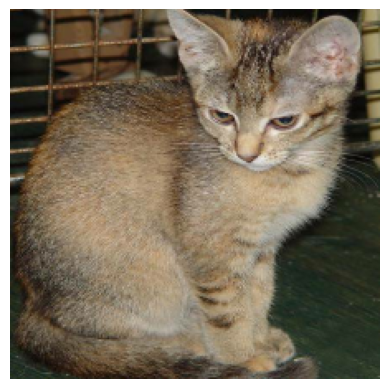

Predicted: 
Egyptian_cat  :  0.7449504
tabby  :  0.15721804
tiger_cat  :  0.053124856
lynx  :  0.039736915
Siamese_cat  :  0.0013180504


In [6]:
decoded_preds = decode_predictions(preds, top=5)
for img, pred in enumerate(decoded_preds[:1]):
    plt.imshow(np.array(test_list[0][0][img])/255)
    plt.axis('off')
    plt.show()
    print('Predicted: ')
    for pred_class in pred:
        print(pred_class[1], " : ", pred_class[2])

# <a class='anchor' id='3.1'></a>

> ## **a) Construir o modelo**

In [7]:
chosenModel = ModeloAll[modeloSelecionado](input_shape=(img_height, img_width, 3), include_top=False)
# chosenModel.summary()
chosenModel.trainable = False

In [8]:
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),  # Espelhamento horizontal
    layers.RandomRotation(0.1),  # Rotação até ±10%
    layers.RandomZoom(0.1),  # Zoom in/out até ±10%
    layers.RandomContrast(0.1),  # Ajuste de contraste
    layers.RandomBrightness(0.1),  # Ajuste de brilho
])

model = keras.Sequential([
    layers.Input(shape=(img_height, img_width, 3)),
    data_augmentation,
    chosenModel,
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1, activation="sigmoid")
])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,926,209 (68.38 MB)

 Trainable params: 3,211,521 (12.25 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

# <a class='anchor' id='3.2'></a>

> ## **b) Compilar a rede**

In [9]:
# Compilar o modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

# <a class='anchor' id='3.3'></a>

> ## **c) Treinar o modelo – max 50 épocas, de pref. a usar callbacks**


In [10]:
# Callback para guardar os pesos do melhor modelo
best_model_checkpoint = keras.callbacks.ModelCheckpoint(
    filepath=f"tmp/transfer_learning_{modeloSelecionado}.weights.h5",  # Caminho onde os pesos do melhor modelo serão guardados
    save_weights_only=True,  # Apenas os pesos do modelo são guardados (não a arquitetura completa)
    monitor='val_loss',  # Monitoriza a perda (loss) no conjunto de validação
    mode='min',  # O melhor modelo será aquele que tiver a menor val_loss
    save_best_only=True  # Apenas guarda o modelo se for o melhor encontrado até ao momento
)

# Callback para interromper o treino cedo caso a perda não melhore
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',  # Monitoriza a perda no conjunto de validação
    patience=5  # Se a val_loss não melhorar durante 5 epochs consecutivas, o treino é interrompido
)

# Callback para reduzir a taxa de aprendizagem quando a perda estabiliza
reduce_lr = keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',  # Monitoriza a perda no conjunto de validação
    factor=0.5,  # Reduz a taxa de aprendizagem para 50% do valor atual
    patience=7,  # Aguarda 7 epochs sem melhoria antes de reduzir a taxa de aprendizagem
    min_lr=1e-6  # Define um limite mínimo para a taxa de aprendizagem (não reduz mais do que isto)
)

In [11]:
# Treinar o modelo (máx. 50 épocas, usando callbacks)
history = model.fit(train, epochs=50, 
                    validation_data=validation,
                    callbacks=[best_model_checkpoint, early_stopping, reduce_lr])

Epoch 1/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 195ms/step - accuracy: 0.7556 - loss: 7.9010 - precision: 0.7539 - recall: 0.7640 - val_accuracy: 0.9740 - val_loss: 0.1182 - val_precision: 0.9756 - val_recall: 0.9717 - learning_rate: 0.0010
Epoch 2/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 184ms/step - accuracy: 0.9094 - loss: 0.2212 - precision: 0.9096 - recall: 0.9113 - val_accuracy: 0.9660 - val_loss: 0.1087 - val_precision: 0.9713 - val_recall: 0.9595 - learning_rate: 0.0010
Epoch 3/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 178ms/step - accuracy: 0.9233 - loss: 0.1940 - precision: 0.9346 - recall: 0.9113 - val_accuracy: 0.9660 - val_loss: 0.1371 - val_precision: 0.9492 - val_recall: 0.9838 - learning_rate: 0.0010
Epoch 4/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 168ms/step - accuracy: 0.9479 - loss: 0.1392 - precision: 0.9549 - recall: 0.9383 - val_accuracy: 0.9740 - val_loss: 0.0997 - val_precision: 0.9643 - val_recall: 0.9838 - learning_rate: 0.0010
Epoch 5/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 158ms/step - accur

# <a class='anchor' id='3.4'></a>

> ## **d) Gráfico que mostre a evolução do treino**

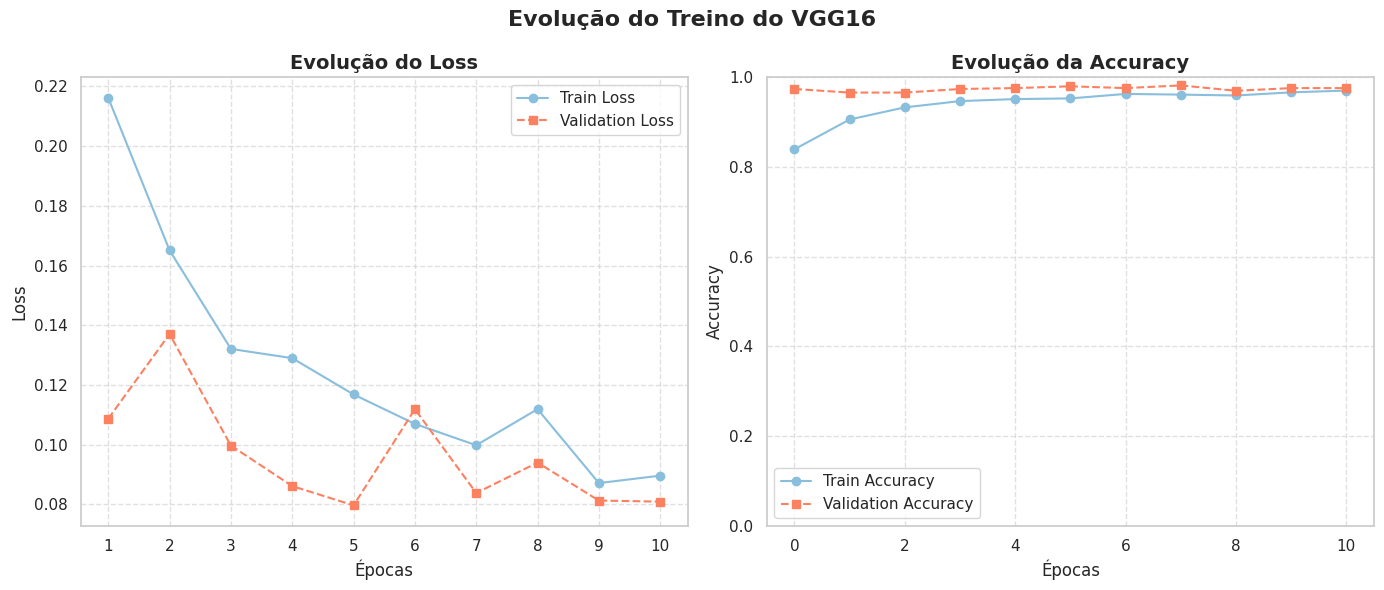

In [12]:
# Configurar o estilo do seaborn
sns.set(style="whitegrid", palette="muted")

# Criar a figura
plt.figure(figsize=(14, 6))

# Subplot para Loss
plt.subplot(1, 2, 1)
epochs = range(1, len(history.history['loss']))  # Garante que começa em 1
plt.plot(epochs, history.history['loss'][1:], label='Train Loss', color=sns.color_palette("Blues")[2], linestyle='-', marker='o', markersize=6)
plt.plot(epochs, history.history['val_loss'][1:], label='Validation Loss', color=sns.color_palette("Reds")[2], linestyle='--', marker='s', markersize=6)
plt.xlabel('Épocas', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.title('Evolução do Loss', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

# Definir os ticks do eixo X para começar em 1
plt.xticks(epochs)


# Subplot para Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy', color=sns.color_palette("Blues")[2], linestyle='-', marker='o', markersize=6)
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color=sns.color_palette("Reds")[2], linestyle='--', marker='s', markersize=6)
plt.xlabel('Épocas', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Evolução da Accuracy', fontsize=14, fontweight='bold')
plt.ylim(0, 1)  # Garantir que o eixo Y da Accuracy vai de 0 a 1
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

# Adicionar um título geral à figura
plt.suptitle(f'Evolução do Treino do {modeloSelecionado}', fontsize=16, fontweight='bold')

# Ajustar espaçamento
plt.tight_layout()
plt.show()

In [13]:
folder_path = Path("tmp")
folder_path.mkdir(parents=True, exist_ok=True)  # Cria a pasta se não existir

# Carregar melhor modelo em validação
model.load_weights(f"tmp/transfer_learning_{modeloSelecionado}.weights.h5")
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,349,253 (92.89 MB)

 Trainable params: 3,211,521 (12.25 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

 Optimizer params: 6,423,044 (24.50 MB)

In [14]:
model.save(f"models/{modeloSelecionado}.keras")

# <a class='anchor' id='3.5'></a>

> ## **e) Cálculo dos acertos no conjunto de teste**

In [15]:
# Avaliação no conjunto de teste
test_loss, test_acc = model.evaluate(test, verbose=0)[:2]
num_acertos = int(test_acc * len(test_labels))
print(f'Accuracy no conjunto de teste: {test_acc:.4f}')
print(f'Número absoluto de acertos: {num_acertos}/{len(test_labels)}')

Accuracy no conjunto de teste: 0.9680
Número absoluto de acertos: 483/500


# <a class='anchor' id='3.6'></a>

> ## **f) Mostrar a matriz de confusão**

16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 140ms/step


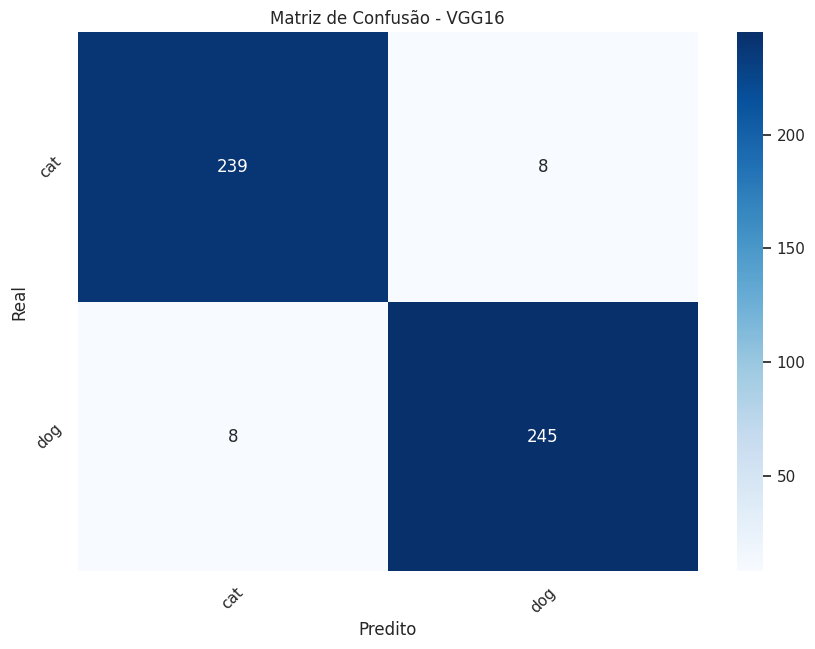

In [16]:
# Predições e matriz de confusão
y_pred = model.predict(test).squeeze()
y_pred_classes = y_pred>0.5
y_true_classes = test_labels.squeeze()

cm = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title(f'Matriz de Confusão - {modeloSelecionado}')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

In [17]:
# Relatório de classificação
print("Relatório de Classificação:")
print(classification_report(y_true_classes, y_pred_classes, target_names=labels))

Relatório de Classificação:
              precision    recall  f1-score   support

         cat       0.97      0.97      0.97       247
         dog       0.97      0.97      0.97       253

    accuracy                           0.97       500
   macro avg       0.97      0.97      0.97       500
weighted avg       0.97      0.97      0.97       500



# <a class='anchor' id='3.7'></a>

> ## **g) Saliencia/Heatmap**

In [18]:
linear_model = tf.keras.models.Model(inputs=[model.layers[0].input], outputs=[model.layers[-2].output])
train_preds = model.predict(train).squeeze()
labels

train_list = list(train)
score = BinaryScore(0)
saliency = Saliency(model, clone=False)

63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 118ms/step 


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_42
Received: inputs=['Tensor(shape=(1, 224, 224, 3))']
  warnings.warn(msg)


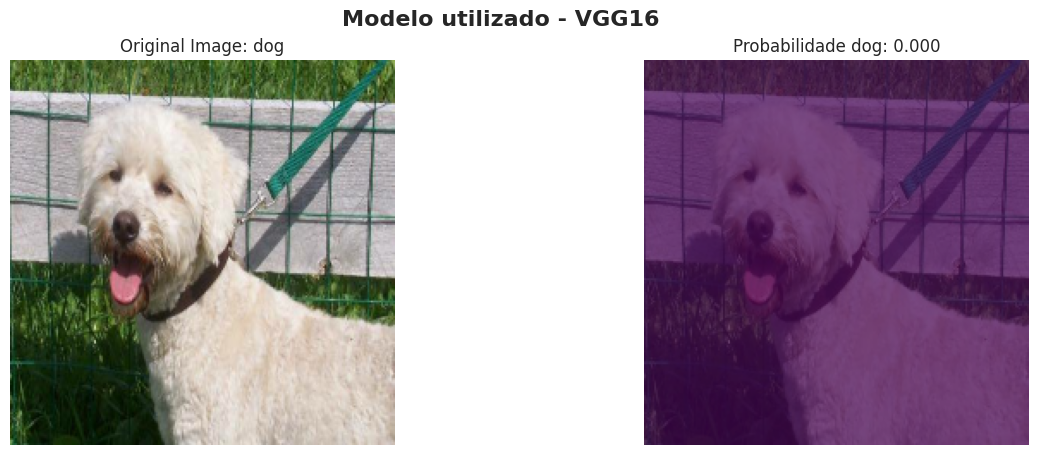

In [19]:
# Load and preprocess an example image
img_id = 8 # 5656
img = train_list[0][0][img_id]  # Tensor
img_array = np.expand_dims(img, axis = 0)  # Normalize and add batch dimension, now numpy array
# Compute saliency map
saliency_map = saliency(score, img_array, smooth_samples=20, smooth_noise=0.2, normalize_map=True)
# saliency_map = normalize(saliency_map)
# Overlay saliency map on original image
heatmap = cv2.cvtColor(cv2.applyColorMap(np.uint8(np.floor(saliency_map*255)).squeeze(), cv2.COLORMAP_VIRIDIS), cv2.COLOR_BGR2RGB)
overlay = cv2.addWeighted(heatmap, 0.7, np.uint8(img), 0.3, 0)

# Display results
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].imshow(img/255)
ax[0].set_title(f"Original Image: {labels[int(train_list[0][1][img_id])]}")
ax[0].axis("off")

ax[1].imshow(overlay)
ax[1].set_title(f"Probabilidade {labels[1]}: {train_preds[img_id]:.3f}")
ax[1].axis("off")

# Adicionar um título geral à figura
plt.suptitle(f'Modelo utilizado - {modeloSelecionado}', fontsize=16, fontweight='bold')

plt.show()


In [20]:
# Get all test images as list of np arrays
test_images = []
test_class = []
for batch_x, batch_y in test:
    for image, class_ in zip(batch_x, batch_y):
        test_images.append(np.array(image))
        test_class.append(class_)

# Erradas
bad_preds = (y_pred_classes != y_true_classes).nonzero()[0]

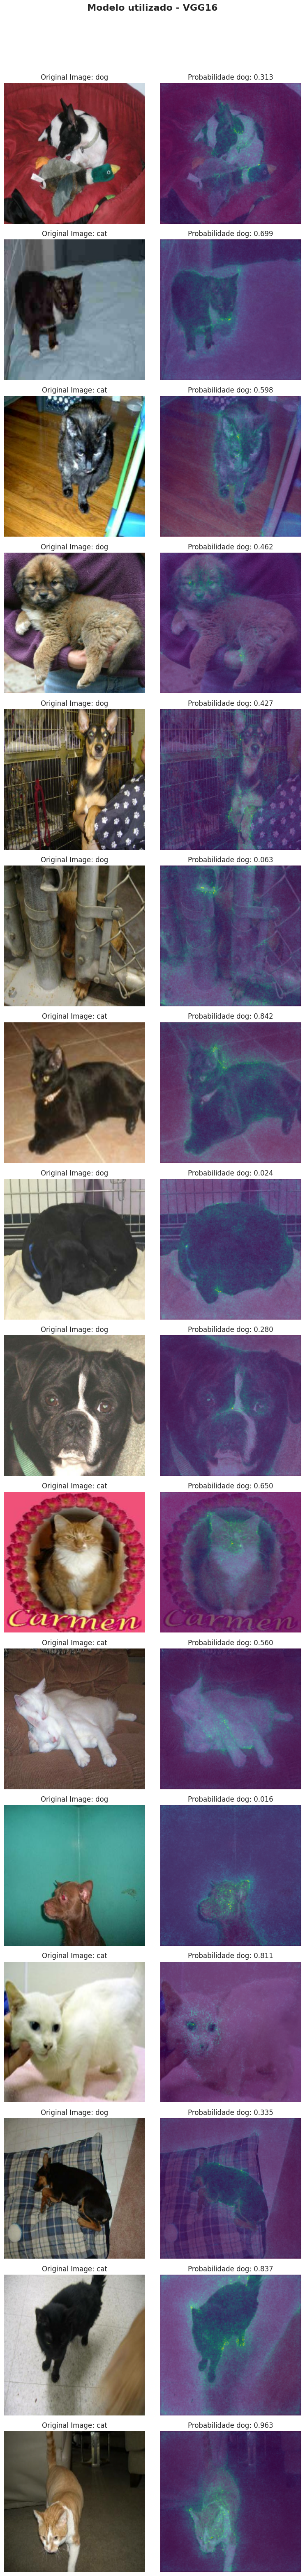

In [21]:
fig, ax = plt.subplots(len(bad_preds), 2, figsize=(8, 4 * len(bad_preds)))

for idx, img_id in enumerate(bad_preds):
    # Load and preprocess an example image
    img = test_images[img_id]  # array
    img_array = np.expand_dims(img, axis = 0)  # Normalize and add batch dimension, now numpy array
    # Compute saliency map
    saliency_map = saliency(score, img_array, smooth_samples=20, smooth_noise=0.2, normalize_map=True)
    # saliency_map = normalize(saliency_map)
    # Overlay saliency map on original image
    heatmap = cv2.cvtColor(cv2.applyColorMap(np.uint8(np.floor(saliency_map*255)).squeeze(), cv2.COLORMAP_VIRIDIS), cv2.COLOR_BGR2RGB)
    overlay = cv2.addWeighted(heatmap, 0.7, np.uint8(img), 0.3, 0)
    
    # Display results
    # fig, ax = plt.subplots(1, 2, figsize=(15, 5))
    ax[idx, 0].imshow(img/255)
    ax[idx, 0].set_title(f"Original Image: {labels[int(test_class[img_id])]}")
    ax[idx, 0].axis("off")
    
    ax[idx, 1].imshow(overlay)
    ax[idx, 1].set_title(f"Probabilidade {labels[1]}: {y_pred[img_id]:.3f}")
    ax[idx, 1].axis("off")

    # Adicionar um título geral à figura
plt.suptitle(f'Modelo utilizado - {modeloSelecionado}', fontsize=16, fontweight='bold')
    
plt.tight_layout()  # Ajusta o layout para evitar sobreposição
plt.subplots_adjust(top=0.95)  # Ajusta o espaço para o título geral
plt.show()
